# Classification

---

Actually, classification is a regression but in narrow (discrete) interval. In classification, we try to classify objects, events, or even people into some category based on their similarities or some common criteria. In regression task we try to find best fitting line to our data, whereas in classification task we also try to find a line which gives us the best separation or discrimination between categories or groups. Compared to regression, in classification the target is not a continuous variable, rather then discrete, taking finite number of values. Such as survived or not survived, defaulted or not defaulted, spam or not spam, and so on. There are three types of classification in a wild:


* **Binary Classification**


* **Multi-Class Classification**


* **Multi-Label Classification**


In this class, we only focus on binary classification. However, you will have solid foundation to dig deeper down in the rabbit whole.


$$
$$


![alt text](images/classification.png "Title")


$$
$$



### Lecture outline

---

* Problem Statement


* Data Description


* EDA - Exploratory Data Analysis


* Data Processing


* Logistic Regression


* Decision Tree Classification


* Random Forest Classification


* Model Performance Assessment

#### Reference


[Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)


[Discrete Choice Models](https://www.statsmodels.org/stable/examples/index.html#discrete-choice-models)


[sklearn - Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


[sklearn - Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


[sklearn - Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [2]:
# For data processing
import pandas as pd
import numpy as np

# For data viz
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# For model performance assessment
from sklearn import metrics

In [3]:
plt.style.use("seaborn") # Set plotting style

## Problem Statement


---


The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**. This is a very unforgettable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for beginner to start a journey in data science and machine learning.

The objective of today's class is to find factors/features, which had relatively higher or lower impact on people's death on Titanic and build a model to predict the probability of dying.


$$
$$


> **Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.**

[Lisa Kleypas](https://en.wikipedia.org/wiki/Lisa_Kleypas)

## Data Description


---

We are given information about a subset of the Titanic population and asked to build a predictive model that tells us whether or not a given passenger survived the shipwreck or not. We are given 10 basic explanatory variables, including passenger gender, age, and price of fare, among others.


$$
$$


* **PassengerId**: Unique identifier for a passenger


* **Survived**: Survival. 0 = No, 1 = Yes. This is our target variable


* **Pclass**: Ticket class. A proxy for socio-economic status (SES). 1st = Upper, 2nd = Middle, 3rd = Lower


* **Name**: Name of the passenger


* **Sex**: Gender of the passenger


* **Age**: Age in years. Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5


* **SibSp**: Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:


    * Sibling = brother, sister, stepbrother, stepsister

    * Spouse = husband, wife (mistresses and fiancés were ignored)


* **Parch**: Number of parents / children aboard the Titanic. The dataset defines family relations in this way:
    
    
    * Parent = mother, father
    
    * Child = daughter, son, stepdaughter, stepson
    
    * Some children travelled only with a nanny, therefore parch=0 for them.


* **Ticket**: Ticket number


* **Fare**: Passenger fare


* **Cabin**: Cabin number


* **Embarked**: Port of Embarkation. C - Cherbourg, Q - Queenstown, S - Southampton

In [4]:
df = pd.read_csv("data/train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA - Exploratory Data Analysis


---


The goal of this section is to gain an understanding of our data in order to do proper feature engineering and modeling.

In [6]:
df.describe().iloc[:, 1:].round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.shape

(891, 12)

### Checking Missing Values


---

As we see we have missing values. We will impute them in `Data Processing` section

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Age` missing values. Approximately 20% of entries for passenger age are missing. Let's see what the `Age` variable looks like in general.

In [20]:
print(f"Percent of missing in Age is: {(df['Age'].isnull().sum() / df.shape[0]) * 100}")

Percent of missing in Age is: 19.865319865319865


The `Age` variable is right skewed. Using the mean for imputing missing values might give us biased results. To deal with this, we'll use the median to impute the missing values.

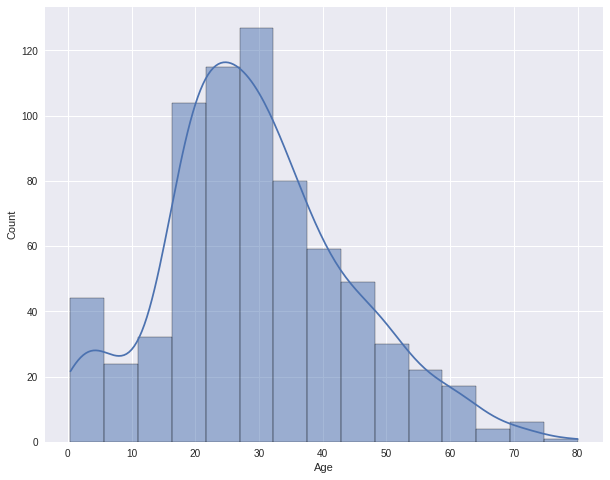

In [22]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="Age", bins=15, kde=True);

77% of records are missing in  `Cabin` variable, which means that imputing information and using this variable for prediction is probably not wise.

In [24]:
print(f"Percent of missing in Cabin is: {(df['Cabin'].isnull().sum() / df.shape[0]) * 100}")

Percent of missing in Cabin is: 77.10437710437711


### Apriori probability of survival

---

We compute the apriori probability of survival. This is the probability of survival not considering any other factors affecting it.

Here we see that there is a 61.6% chance of survival.

In [63]:
pd.DataFrame(df["Survived"].value_counts(normalize=True).round(3))

,Survived
0,0.616
1,0.384


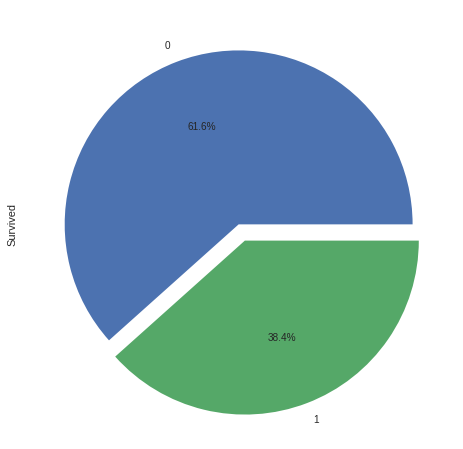

In [35]:
plt.figure(figsize=(10, 8))

df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%');

### `Survival` rate by `Sex`

---

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%. Clearly being female greatly increased your chances of survival.

In [57]:
pd.DataFrame(df[['Sex','Survived']].groupby(['Sex']).mean())

,Survived
Sex,
female,0.742038
male,0.188908


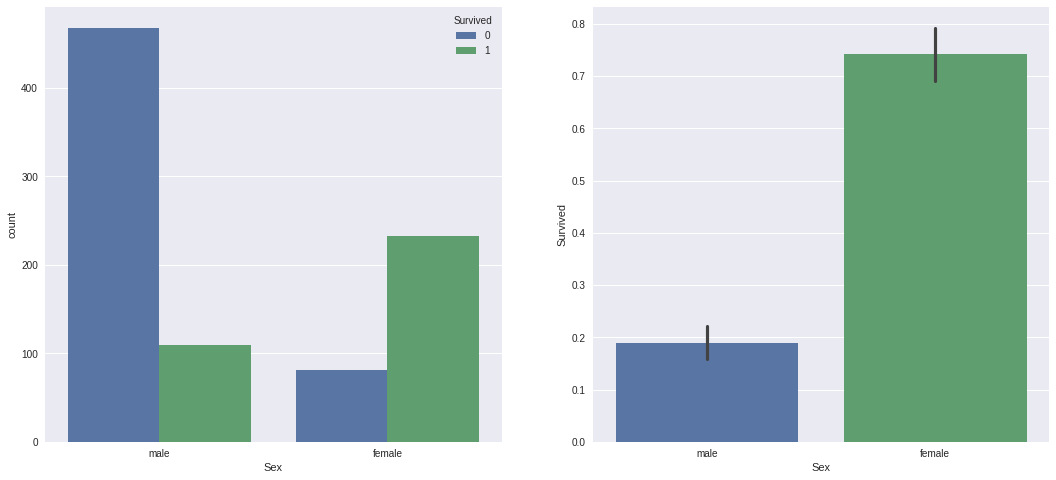

In [62]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.countplot(data=df, x="Sex", hue="Survived", ax=ax[0])

sns.barplot(data=df, x="Sex", y="Survived", ax=ax[1]);

### `Survival` rate by `Pclass`

---

People say **Money Can't Buy Everything**. But we can clearly see that passengers Of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

In [70]:
pd.crosstab(df["Pclass"], df["Survived"]).style.background_gradient(cmap="summer_r")

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


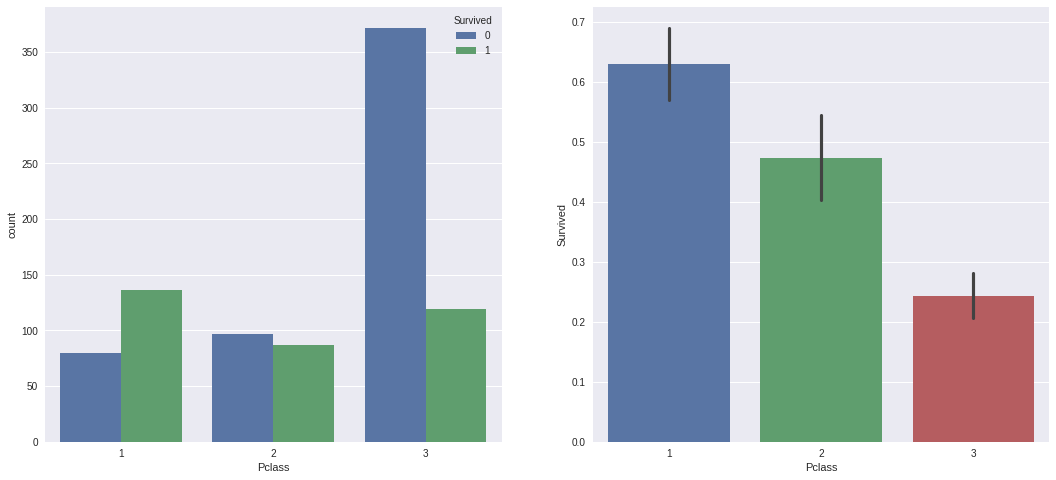

In [72]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.countplot(data=df, x="Pclass", hue="Survived", ax=ax[0])

sns.barplot(data=df, x="Pclass", y="Survived", ax=ax[1]);

###  `Survival` rate with `Sex` and `Pclass`

---

Looking at the CrossTab and the Catplot, we can easily infer that survival for Women from Pclass 1 is about 95%-96%, as only 3 out of 94 Women from Pclass 1 died.

It is evident that irrespective of Pclass, women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate.

In [76]:
pd.crosstab([df["Sex"], df["Survived"]], df["Pclass"]).style.background_gradient(cmap="summer_r")

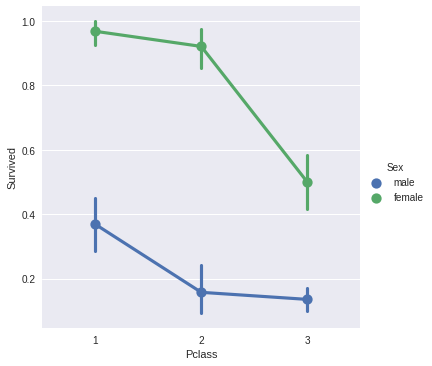

In [91]:
sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", kind="point");

### `Survival` rate by `Embarked`

---

The chances for survival for port `Cherbourg` is highest around 55% while it is lowest for port `Southampton`.

In [84]:
pd.crosstab([df["Embarked"], df["Pclass"]],
            [df["Sex"], df["Survived"]]).style.background_gradient(cmap='summer_r')

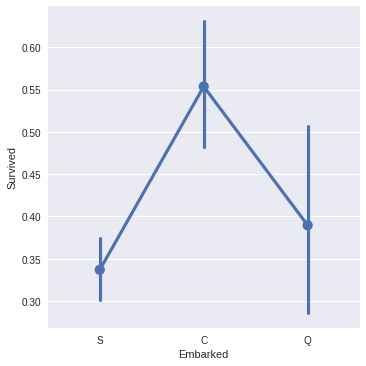

In [94]:
sns.catplot(data=df, x="Embarked", y="Survived", kind="point");

The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of the port of embarkation.

Port `Queenstown` looks to be the unluckiest for man, as almost all were from Pclass 3

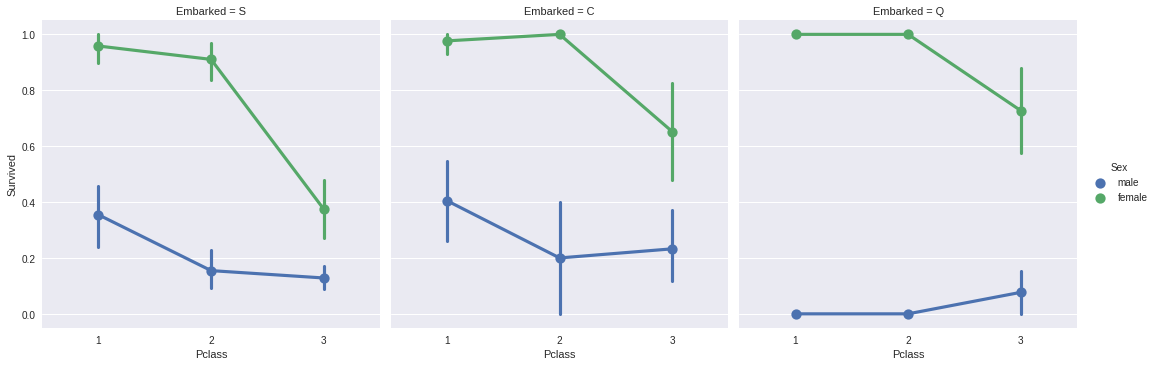

In [97]:
sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", col="Embarked", kind="point");

### `Survival` rate by `SibSip`

---

This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife


If a passenger is alone on board with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first.

In [118]:
pd.crosstab([df["SibSp"]], df["Survived"]).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


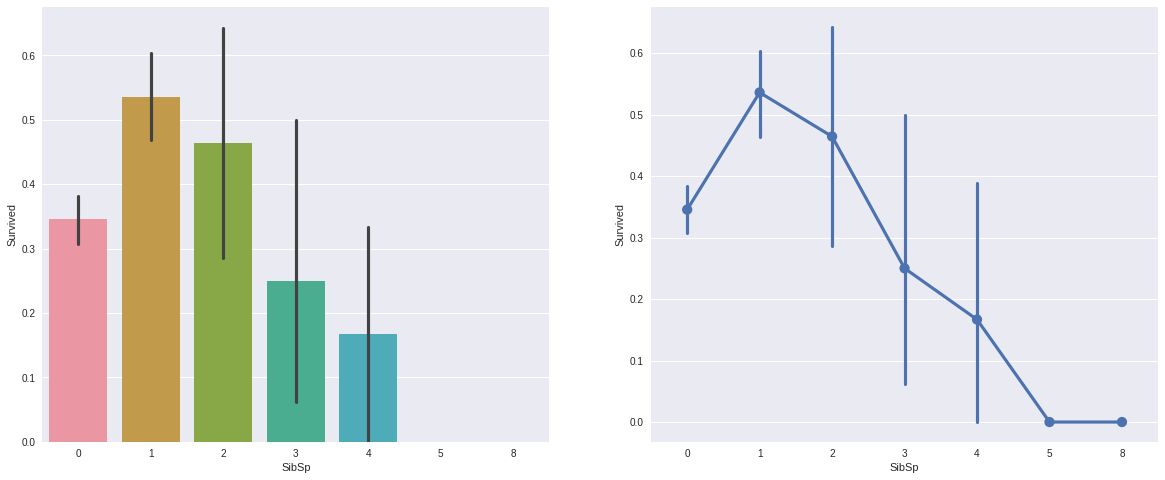

In [126]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(data=df, x="SibSp", y="Survived", ax=ax[0])

sns.pointplot(data=df, x="SibSp", y="Survived", kind="point", ax=ax[1]);

### `Survival` rate by `Parch`

---

Passengers with their parents on board have greater chance of survival. It however reduces as the number goes up.

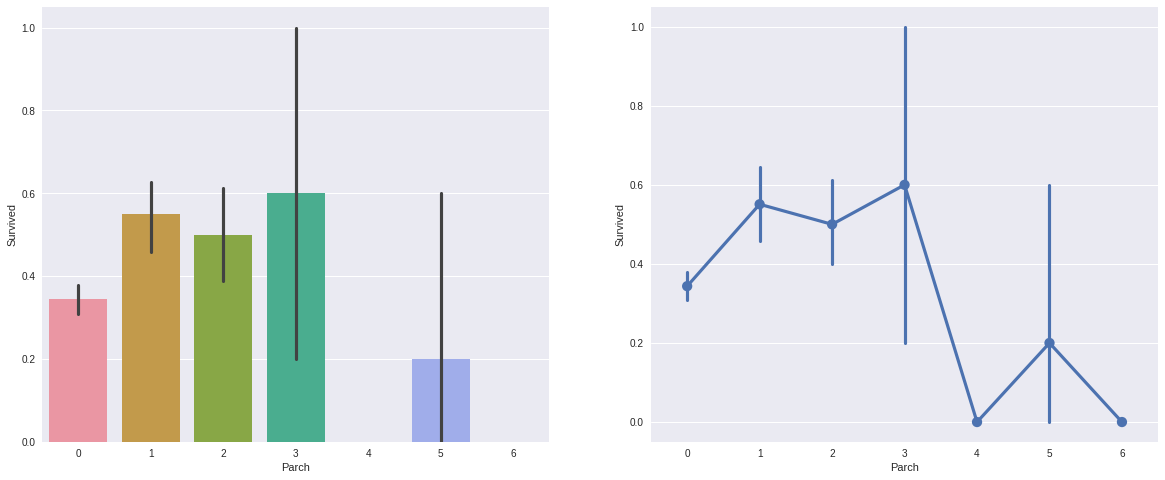

In [128]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(data=df, x="Parch", y="Survived", ax=ax[0])

sns.pointplot(data=df, x="Parch", y="Survived", ax=ax[1]);

### Fare

---

There looks to be a large distribution in the fares of Passengers in Pclass 1 and this distribution goes on decreasing as the standards reduces. As this is also continuous, we can convert into discrete values by using binning.

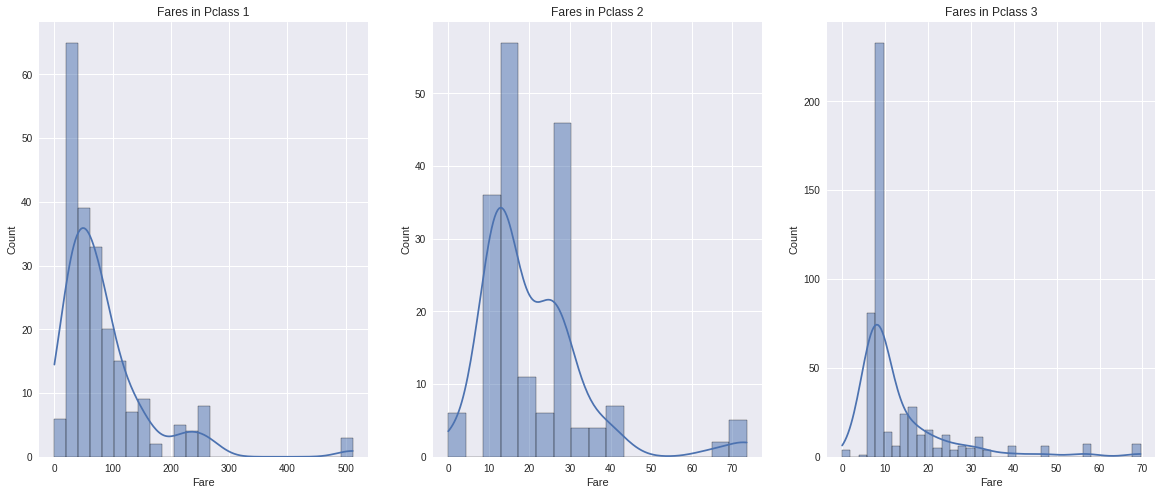

In [135]:
f, ax = plt.subplots(1, 3, figsize=(20,8))

sns.histplot(df[df["Pclass"] == 1]["Fare"], kde=True, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")

sns.histplot(df[df["Pclass"] == 2]["Fare"], kde=True, ax=ax[1])
ax[1].set_title("Fares in Pclass 2")

sns.histplot(df[df["Pclass"] == 3]["Fare"], kde=True, ax=ax[2])
ax[2].set_title("Fares in Pclass 3");

## Data Processing


---

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can add new features by observing or extracting information from other features.

In this stage, we process data in a way to convert it suitable for modeling.

### Fill missing values in `Age`

---

We saw that the `Age` variable had lots of missing values. Filling these missing values by mean or median age will not be a wise action, since there are children aged 0.42 years and we fill missing values for them with 29.69 years or 28 years.

The way out from this will be to figure out what age-band does the passenger lie.

To find the age group, we can use `Name` variable. We can extract the initials of the passengers and then group them.

In [100]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We are using the regex: `([A-Za-z]+)\.` So what it does is, it looks for strings which lie between `A-Z` or `a-z` and followed by a `.(dot)`. Hence, we successfully extract the initials from the `Name`. Note that some initials are misspelled and need to replace them.

In [104]:
df["Initials"] = df["Name"].str.extract('([A-Za-z]+)\.')

In [111]:
df["Initials"] = df['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']).str.strip()

In [113]:
df.groupby("Initials")["Age"].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling missing values by Age group mean

In [116]:
df.loc[(df["Age"].isnull()) & (df["Initials"] == "Master"), "Age"] = 5

df.loc[(df["Age"].isnull()) & (df["Initials"] == "Miss"), "Age"] = 22

df.loc[(df["Age"].isnull()) & (df["Initials"] == "Mr"), "Age"] = 33

df.loc[(df["Age"].isnull()) & (df["Initials"] == "Mrs"), "Age"] = 36

df.loc[(df["Age"].isnull()) & (df["Initials"] == "Other"), "Age"] = 46

#### Binning `Age` variable

---

The age range is 0-80 and we can divide `Age` into 5 bins.

In [140]:
df['Age_band'] = 0

df.loc[df["Age"] <= 16, "Age_band"] = 0

df.loc[(df["Age"] > 16) & (df["Age"] <= 32), "Age_band"] = 1

df.loc[(df["Age"] > 32) & (df["Age"] <= 48), "Age_band"] = 2

df.loc[(df["Age"] > 48) & (df["Age"] <= 64), "Age_band"] = 3

df.loc[df["Age"] > 64, "Age_band"] = 4

In [142]:
df["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer_r")

,Age_band
1,382
2,325
0,104
3,69
4,11


The survival rate decreases as the age increases irrespective of the Pclass.

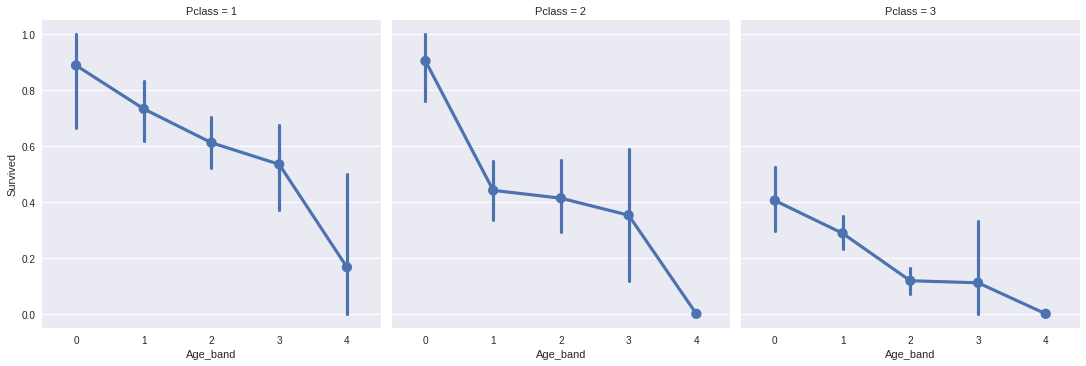

In [144]:
sns.catplot(data=df, x="Age_band", y="Survived", col="Pclass", kind="point");

### Filling missing values in `Embarked`

---

As `Southampton` is the mode of `Embarked` column, we impute missing values by it.

In [145]:
df["Embarked"].mode()

0    S
dtype: object

In [147]:
df["Embarked"] = df["Embarked"].fillna("S")

### `Family_Size` and `Alone`

---

At this point, we can create a new feature called `Family_Size` and `Alone` and analyze it. This feature is the summation of `Parch` and `SibSp`. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [149]:
df["Family_Size"] = df["Parch"] + df["SibSp"]


df["Alone"] = 0

df.loc[df["Family_Size"] == 0, "Alone"] = 1

`Family_Size=0` means that the passenger is alone. Clearly, if you are alone or `Family_Size=0`, then chances for survival is very low. For `Family Size > 4`, the chances decrease too.

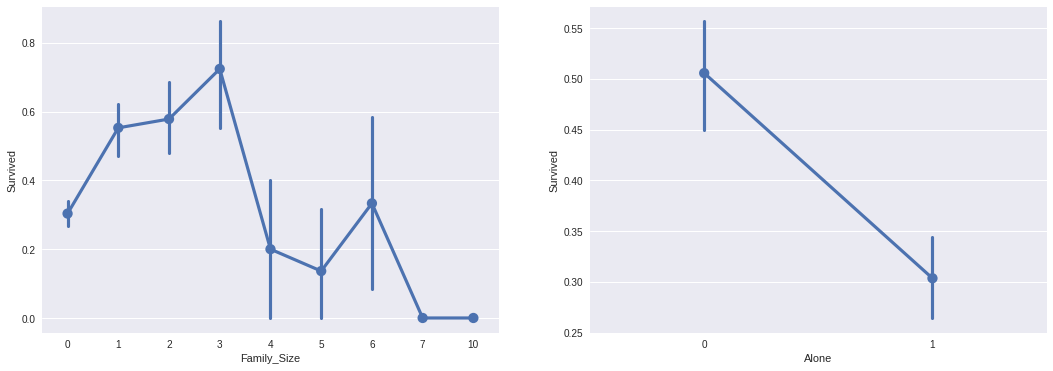

In [153]:
f, ax = plt.subplots(1, 2, figsize=(18,6))

sns.pointplot(data=df, x="Family_Size", y="Survived", kind="point" ,ax=ax[0])

sns.pointplot(data=df, x="Alone", y="Survived", kind="point", ax=ax[1]);

It is clear that being alone is harmful irrespective of `Sex` or `Pclass`, except for `Pclass 3` where the chances of females who are alone is high than those with family.

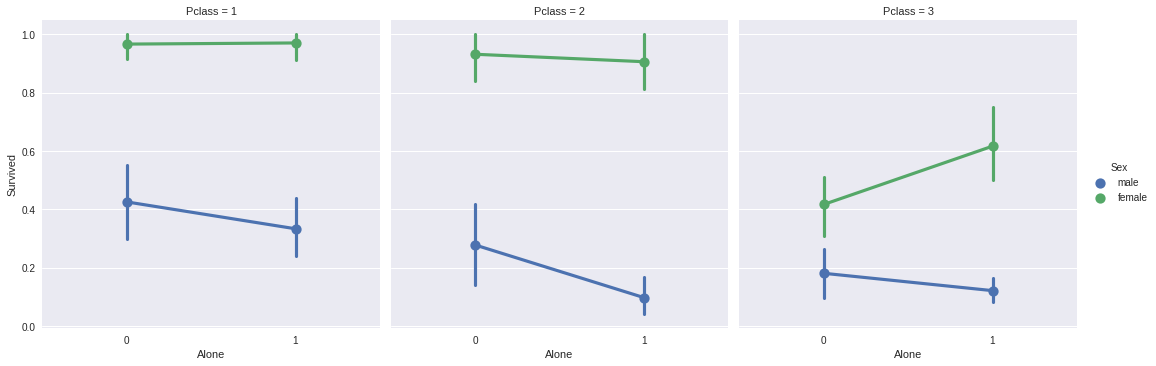

In [157]:
sns.catplot(data=df, x="Alone", y="Survived", hue="Sex", col="Pclass", kind="point");

### Fare_Range

---

However `Fare` is a continuous feature, we need to convert it into ordinal value. For this we will use Pandas `qcut()` method. It splits or arranges the values according the number of bins we have passed. So if we pass for 4 bins, it will arrange the values equally spaced into 4 separate bins.

In [161]:
df["Fare_Range"] = pd.qcut(df["Fare"], 4)

we can clearly see that as the `Fare_Range` increases, the chances of survival increases too.

In [162]:
df.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Now we cannot pass the `Fare_Range` values as it is. We should convert it into singleton values same as we did in `Age_band`.

In [164]:
df["Fare_cat"] = 0

df.loc[df["Fare"] <= 7.91, "Fare_cat"] = 0

df.loc[(df["Fare"] > 7.91) & (df["Fare"] <= 14.454), "Fare_cat"] = 1

df.loc[(df["Fare"] > 14.454) & (df["Fare"] <= 31), "Fare_cat"] = 2

df.loc[(df["Fare"] > 31) & (df["Fare"] <= 513), "Fare_cat"]=3

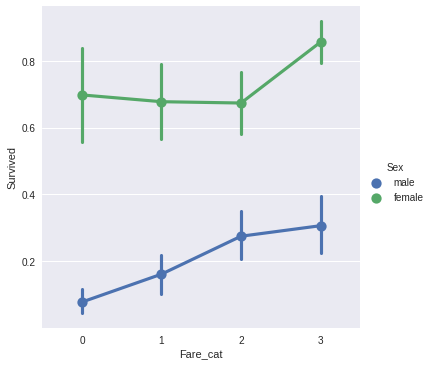

In [166]:
sns.catplot(data=df, x="Fare_cat", y="Survived", hue="Sex", kind="point");

### Converting String Values into Numeric

---

Since we cannot pass strings to a machine learning model, we need to convert features like `Sex`, `Embarked`, and `Initials` into numeric values.

In [169]:
df["Sex"] = df["Sex"].replace(["male", "female"], [0, 1])

df["Embarked"] = df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2])

df["Initials"] = df["Initials"].replace(["Mr", "Mrs", "Miss", "Master", "Other"], [0, 1, 2, 3, 4])

### Drop Redundant Features

---

After all these manipulations some features become redundant or even duplicate. We need to remove them.

$$
$$

**Name** - We have `Initials` features.


**Age** - We have the `Age_band` feature, instead.


**Ticket** - Seems to be a random string and may not carry any information.


**Fare** - We have the `Fare_cat` feature, instead.


**Cabin** - A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.


**Fare_Range** - We have the `Fare_cat` feature.


**PassengerId** - This is a unique identifier for a passenger and does not carry any information.

In [173]:
df = df.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"], axis=1).reset_index(drop=True)

In [174]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initials,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


### Train-Test Split

In [176]:
X = df.drop(["Survived"], axis = 1)

y = df["Survived"]

In [177]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=425, shuffle=True, stratify=y)

In [178]:
print("X train size: \t", x_train.shape)
print("Y train size: \t", y_train.shape)

print("X test size: \t", x_test.shape)
print("Y test size: \t", y_test.shape)

X train size: 	 (712, 10)
Y train size: 	 (712,)
X test size: 	 (179, 10)
Y test size: 	 (179,)


## Logistic Regression


---


Explain what is a binary logistic regression




$$
$$

![alt text](images/logistic_regression.jpeg "Title")

In [179]:
logistic_regression = LogisticRegression() # Create model object

In [182]:
logistic_regression.fit(x_train, y_train) # Fit model to the data - actual model training

LogisticRegression()

In [183]:
prediction_logistic_regression = logistic_regression.predict(x_test)

In [184]:
print("The accuracy of the Logistic Regression is: ", metrics.accuracy_score(prediction_logistic_regression,
                                                                             y_test))

The accuracy of the Logistic Regression is:  0.8212290502793296


## Decision Tree Classification - აღწერა გასასწორებელია


---


Decision Trees can also help a lot when we need to understanding the data. A good example is the traditional problem of classifying Iris flowers included in the sklearn documentation, were we can learn about the characteristics of each flower type in the resulting tree. Given their transparency and relatively low computational cost, Decision Trees are also very useful for exploring your data before applying other algorithms. They're helpful for checking the quality of engineered features and identifying the most relevant ones by visualising the resulting tree.

The main downsides of Decision Trees are their tendency to over-fit, their inability to grasp relationships between features, and the use of greedy learning algorithms (not guaranteed to find the global optimal model). Using them in a Random Forest helps mitigate some of this issues.

After this short introduction to Decision Trees and their place in Machine Learning, let's see how to apply them for the Titanic challenge. First, we're going to prepare the dataset and discuss the most relevant features. We'll then find the best tree depth to avoid over-fitting, generate the final model, and explain how to visualise the resulting tree.



$$
$$

![alt text](images/decision_tree.png "Title")

https://www.kaggle.com/masumrumi/decision-tree-with-titanic-dataset



https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

In [185]:
tree_classificator = DecisionTreeClassifier(random_state=425) # Create model object

In [186]:
tree_classificator.fit(x_train, y_train) # Fit the model

DecisionTreeClassifier(random_state=425)

In [187]:
prediction_tree = tree_classificator.predict(x_test)

In [188]:
print("The accuracy of the Decision Tree is: ", metrics.accuracy_score(prediction_tree, y_test))

The accuracy of the Decision Tree is:  0.8100558659217877


### Feature Importances

In [190]:
features = x_test.columns.to_list()

importances = tree_classificator.feature_importances_

indices = np.argsort(importances)

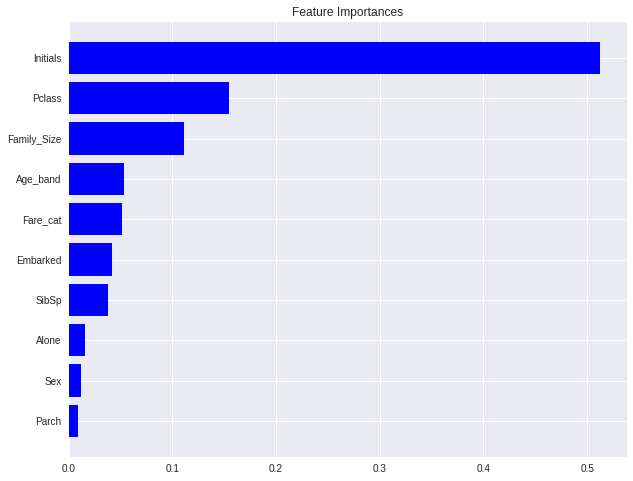

In [191]:
plt.figure(figsize=(10, 8))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="blue", align="center")

plt.yticks(range(len(indices)), [features[i] for i in indices]);

## Random Forest Classification


---

Explain Random Forest




$$
$$

![alt text](images/random_forest.png "Title")

In [193]:
forest_classifier = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=425) # Create model onject

In [194]:
forest_classifier.fit(x_train, y_train) # Fit the model

RandomForestClassifier(max_depth=3, n_estimators=150, random_state=425)

In [195]:
prediction_forest = forest_classifier.predict(x_test)

In [196]:
print("The accuracy of the Random Forest is: ", metrics.accuracy_score(prediction_forest, y_test))

The accuracy of the Random Forest is:  0.8268156424581006


### Feature Importances

In [197]:
features = x_test.columns.to_list()

importances = forest_classifier.feature_importances_

indices = np.argsort(importances)

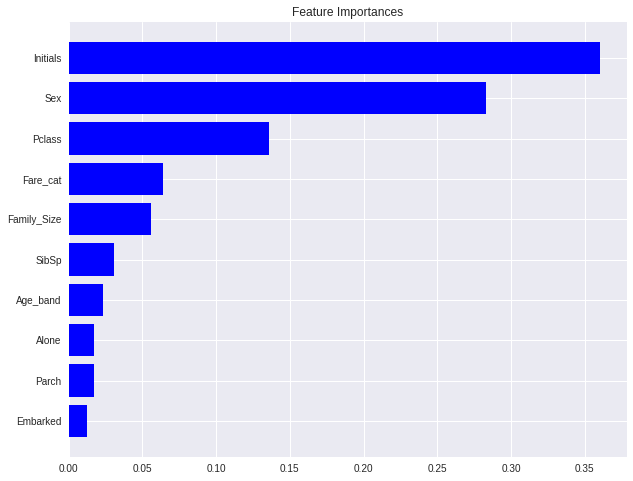

In [198]:
plt.figure(figsize=(10, 8))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="blue", align="center")

plt.yticks(range(len(indices)), [features[i] for i in indices]);

## Model Performance Assessment


---

confusion matrix, ROC-AUC და კიდევ რაღაცეები


https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d

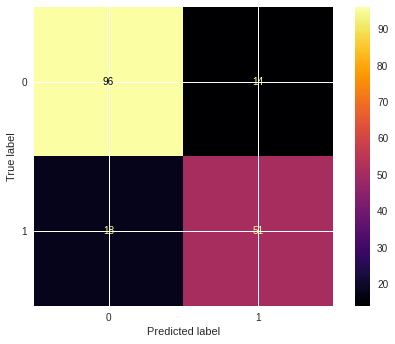

In [204]:
metrics.plot_confusion_matrix(logistic_regression, x_test, y_test, cmap="inferno");

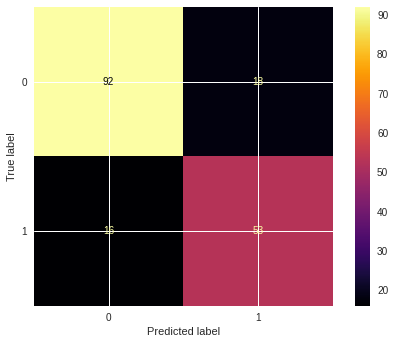

In [205]:
metrics.plot_confusion_matrix(tree_classificator, x_test, y_test, cmap="inferno");

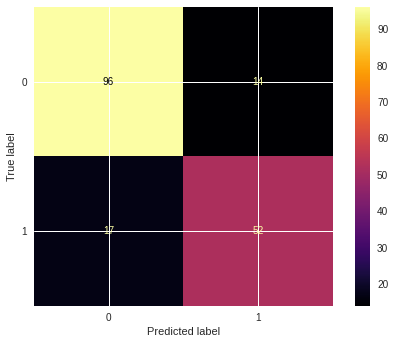

In [206]:
metrics.plot_confusion_matrix(forest_classifier, x_test, y_test, cmap="inferno");

## Summary

---

sdgfsdgs